# Linear SVC & Expected Value

This notebook will require the following dataset:
- ```Caravan.csv```

This dataset is from a Dutch company, and contains information from 5,822 insurance clients. This information includes their demographics, how many houses or cars they own, and what insurance policies they have bought.

The goal is predict whether or not a customer will buy caravan insurance, based on all the other information. 

As the column headers are Dutch abbreviations, they won't mean much for us. You can read about them here: https://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html.

In [151]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('Caravan.csv')
df

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


The dataset has been split into target, categorical and numerical columns for you.

In [152]:
y = df['Purchase'] == 'Yes'

X_categorical = df[['MOSTYPE', 'MOSHOOFD']]
X_numerical = df.drop(columns = ['MOSTYPE', 'MOSHOOFD', 'Purchase'])

The following code shows how to use the OneHotEncoder to encode categorical columns into multiple binary columns.

In [153]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(drop = 'first', # Drops the first category, so if there are m categories, we end up with m-1 new columns 
                       sparse = False  # Return a dense array (i.e. an ordinary array) instead of a sparse one
                      )

X_categorical = onehot.fit_transform(X_categorical)
X_categorical = pd.DataFrame(X_categorical, columns = onehot.get_feature_names_out())
X_categorical

,MOSTYPE_2,MOSTYPE_3,MOSTYPE_4,MOSTYPE_5,MOSTYPE_6,MOSTYPE_7,MOSTYPE_8,MOSTYPE_9,MOSTYPE_10,MOSTYPE_11,...,MOSTYPE_41,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 1. Concatenate ```X_numerical``` and ```X_categorical``` into a single dataframe ```X``` with 5,822 rows and 131 columns.


In [154]:
X = pd.concat([X_numerical, X_categorical], axis = 1)
X

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,...,MOSTYPE_41,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10
0,1,3,2,0,5,1,3,7,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2,2,1,4,1,4,6,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,2,2,0,4,2,4,3,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,3,2,3,2,4,5,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,2,1,4,1,4,7,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,1,2,0,6,1,2,1,2,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5818,1,4,4,1,4,1,4,6,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5819,1,3,4,0,6,0,3,5,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5820,1,3,2,0,7,0,2,7,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 2. Do a *stratified* train-test split with 30% test data. Use random state 2022.



In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022, stratify = y)

### 3. Make a pipeline consisting of a Standard Scaler followed by Linear SVC, and fit it on the training data.

For the Linear SVC, use the following parameters:
- C = 0.1
- max_iter = 5000
- random_state = 2022



In [156]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svc = make_pipeline(StandardScaler(), LinearSVC(C = 0.1))  

svc.fit(X_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.1))])

### 4. Use the trained model to make predictions on the test set and generate a classification report.

Don't worry if the results for the 'True' class look terrible!



In [157]:
y_pred = svc.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.00      0.00      0.00       104
       False       0.94      1.00      0.97      1643

    accuracy                           0.94      1747
   macro avg       0.47      0.50      0.48      1747
weighted avg       0.88      0.94      0.91      1747



### 5. Compute the SVC decision function on the test data.



In [159]:
y_scores = svc.decision_function(X_test)
y_scores

array([-0.83675801, -0.71616089, -0.92149721, ..., -0.92138846,
       -0.69461482, -0.93730076])

### 6. Compute and plot the precision-recall curve.



In [160]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_scores, pos_label = True)
prec, rec, thresholds

(array([0.05953062, 0.05956472, 0.05959885, ..., 0.        , 0.        ,
        1.        ]),
 array([1., 1., 1., ..., 0., 0., 0.]),
 array([-2.51062936, -2.33196425, -2.29134311, ...,  0.14264155,
         0.63693421,  0.66301168]))

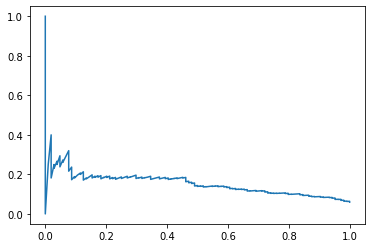

In [161]:
plt.plot(rec, prec)

### 7. Create a DataFrame ```pr_df``` with the thresholds for the index, and two columns "precision" and "recall" containing the precision and recall values.

You'll need to drop the last entry of ```prec``` and ```rec```, as they have one more entry than ```thresholds```.



In [162]:
pr_df = pd.DataFrame(index = thresholds)

pr_df['precision'] = prec[:-1] 
pr_df['recall'] = rec[:-1]

pr_df

,precision,recall
-2.510629,0.059531,1.000000
-2.331964,0.059565,1.000000
-2.291343,0.059599,1.000000
-2.026633,0.059633,1.000000
-1.907836,0.059667,1.000000
...,...,...
-0.083496,0.400000,0.019231
-0.031829,0.250000,0.009615
0.142642,0.000000,0.000000
0.636934,0.000000,0.000000


### 8. Add a column "F1" to ```pr_df```, containing the F1 score. 



In [163]:
F1 = 2*prec*rec/(prec + rec)
pr_df['F1'] = F1[:-1]
pr_df

/var/folders/vy/l1vbckfs6w90015t4sw3zmr80109_6/T/ipykernel_11440/558685469.py:1: RuntimeWarning: invalid value encountered in divide
  F1 = 2*prec*rec/(prec + rec)


,precision,recall,F1
-2.510629,0.059531,1.000000,0.112372
-2.331964,0.059565,1.000000,0.112432
-2.291343,0.059599,1.000000,0.112493
-2.026633,0.059633,1.000000,0.112554
-1.907836,0.059667,1.000000,0.112615
...,...,...,...
-0.083496,0.400000,0.019231,0.036697
-0.031829,0.250000,0.009615,0.018519
0.142642,0.000000,0.000000,NaN
0.636934,0.000000,0.000000,NaN


If you did everything correctly so far, you should get a plot of precision, recall and F1 when you run the following cell. 

<AxesSubplot:>

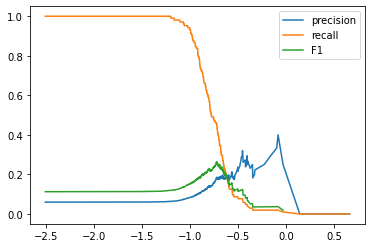

In [164]:
pr_df.plot()

The threshold with the best F1 score seems to be around -0.75.

### 9. Compute a new set of test predictions using this threshold of -0.75. Then print the classification report for these new predictions.



In [165]:
y_pred_2 = y_scores > -0.75

print(classification_report(y_test, y_pred_2, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.16      0.47      0.24       104
       False       0.96      0.84      0.90      1643

    accuracy                           0.82      1747
   macro avg       0.56      0.66      0.57      1747
weighted avg       0.91      0.82      0.86      1747



Observe that precision, recall and F1 for the True class are better than before!

### 10.  Compute and plot the ROC curve.



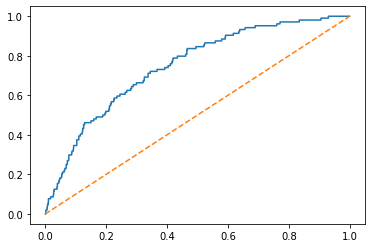

In [166]:
from sklearn.metrics import roc_curve

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label = True)
plt.plot(fpr, tpr)

# Also plot the no-skill classifier for comparision
plt.plot([0,1], [0,1], linestyle = 'dashed')

### 11. Compute the AUROC score.



In [167]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_scores)

0.7477322206095791

For the next question, we will use the normalized confusion matrix, which is just the usual confusion matrix divided by the total number of test samples.

We will compute it for ```y_pred_2``` which contain our predictions from above, based on a threshold of -0.75.

In [168]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_2, labels = [True, False], normalize = 'all')
conf_mat

array([[0.02804808, 0.03148254],
       [0.14939897, 0.79107041]])

We now make the following assumptions:

- Let's assume that our dataset tells us whether or not our customers bought caravan insurance after we marketed it to them. i.e. we have already marketed to all these customers
- Let's also assume that customers would not buy caravan insurance if we do not market it to them (e.g. it could be a new product that they haven't heard of yet)
- The profit we make from a customer buying caravan insurance is 10 gold
- The cost for marketing to each customer is 1 gold

(Assuming that the profit has NOT accounted for the cost of marketing, i.e. you can just assume that profit = revenue - production cost.)

We made a loss by marketing to all these customers, since we spent 5,822 gold but only got back 384 * 10 = 3,840 gold from the customers who purchased caravan insurance. But we can treat that as the cost for gathering data.

We hope that this data will help us better target which customers to market insurance to. 

Thanks to the (training) data, we now have a trained SVC model, which we can use to predict which customers will buy caravan insurance (predicted positives), and market to only these customers. 

We want to know what our expected value will be if we follow this strategy. We can evaluate this on the test data.

### 12. Create a cost-benefit matrix for the above situation.  

Make sure the entries are arranged in the same manner as the confusion matrix. i.e. the actual and predicted True classes are on the top row and left column, respectively.



In [169]:
cost_benefit_matrix = np.array([[9, 0], [-1, 0]])
cost_benefit_matrix

array([[ 9,  0],
       [-1,  0]])

### 13. Compute the expected value if we adopt this marketing strategy.



In [170]:
(conf_mat * cost_benefit_matrix).sum()

0.10303377218088153

This is the expected value when using a threshold of -0.75. 

Let's see what the expected value would be for other thresholds.

### 14. Complete the code below to calculate the expected value for each of the thresholds.



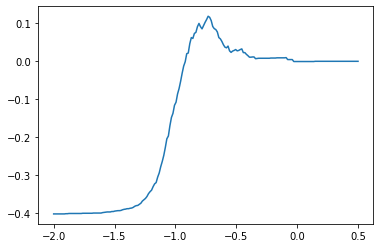

In [175]:
thresholds = np.linspace(-2,0.5,200)

expected_values = []
for t in thresholds:
    # Compute predictions
    y_pred = svc.predict(X_test)
    
    # Set threshold 
    y_pred = y_scores > t

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
    
    # Compute expected value
    expected_values.append((conf_mat * cost_benefit_matrix).sum())
 
plt.plot(thresholds, expected_values)

On the left, we see that we make a loss if we market to everybody. On the right, we see that we won't lose any money if we don't market to anyone, but we also won't make any money.

But by using a threshold of around -0.75 to do our targeted marketing (which happens to coincide with the threshold for optimal F1 score in this case), we can make a slight profit!